In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<Axes: xlabel='Product', ylabel='Income'>

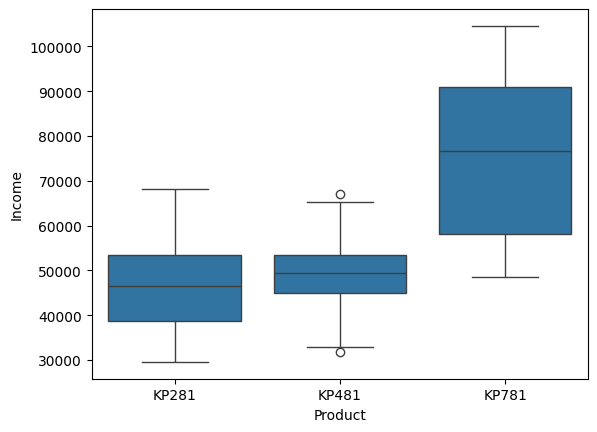

In [7]:
sns.boxplot(x='Product', y='Income', data=df)   # Boxplot

In [16]:
# Grouping --> 3 groups
df['random_group'] = np.random.choice(['g1','g2','g3'], size = len(df))
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g1
1,KP281,19,Male,15,Single,2,3,31836,75,g1
2,KP281,19,Female,14,Partnered,4,3,30699,66,g2
3,KP281,19,Male,12,Single,3,3,32973,85,g2
4,KP281,20,Male,13,Partnered,4,2,35247,47,g2


<Axes: xlabel='random_group', ylabel='Income'>

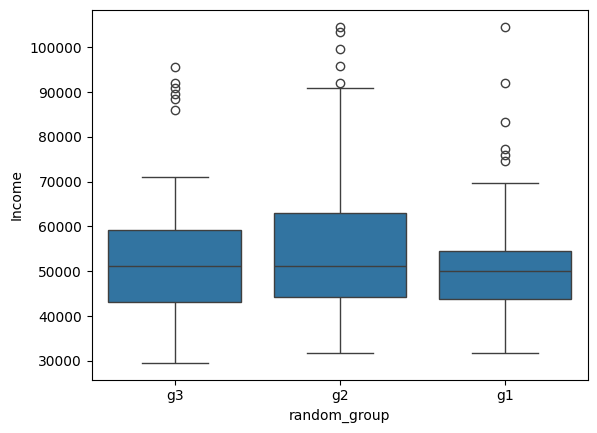

In [10]:
sns.boxplot(x='random_group', y='Income', data = df)

In [17]:
# Setup1:
income_g1 = df[df['random_group'] == 'g1']['Income']
income_g2 = df[df['random_group'] == 'g2']['Income']
income_g3 = df[df['random_group'] == 'g3']['Income']

In [13]:
income_g1.mean()

51507.05970149254

In [15]:
np.mean(income_g2)

56602.732142857145

In [16]:
income_g3.mean()

53487.68421052631

### Scipy Import

In [22]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [18]:
f_oneway(income_g1, income_g2, income_g3)

F_onewayResult(statistic=1.4693839616262188, pvalue=0.23285971737012587)

In [19]:
# H0: All groups have the same mean
# H1: one or more group have different mean

f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")
  print("All groups have the same mean")

Fail to reject H0
All groups have the same mean


In [1]:
# Conclusion for above: just by chance factor not significant

In [6]:
income_kp281 = df[df['Product'] == 'KP281']['Income']
income_kp481 = df[df['Product'] == 'KP481']['Income']
income_kp781 = df[df['Product'] == 'KP781']['Income']

In [7]:
income_kp281.mean()

46418.025

In [10]:
income_kp481.mean()

48973.65

In [9]:
income_kp781.mean()

75441.575

In [20]:
f_oneway(income_kp281, income_kp481, income_kp781)

F_onewayResult(statistic=89.25903546601671, pvalue=1.564499131634248e-27)

In [21]:
# H0: All groups have the same mean
# H1: one or more group have different mean

f_stats, p_value = f_oneway(income_kp281, income_kp481, income_kp781)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")
  print("All groups have the same mean")

Reject H0


### Implement Above with T-Test

In [23]:
t_stat, p_value = ttest_ind(income_kp281, income_kp481)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")
  print("All groups have the same mean")

Fail to reject H0
All groups have the same mean


In [24]:
t_stat, p_value = ttest_ind(income_kp481, income_kp781)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")
  print("All groups have the same mean")

Reject H0


In [25]:
t_stat, p_value = ttest_ind(income_kp281, income_kp781)

if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")
  print("All groups have the same mean")

Reject H0


### **Kruskal Wallis Test**

In [26]:
from scipy.stats import kruskal

In [27]:
kruskal(income_kp281, income_kp481, income_kp781)

KruskalResult(statistic=61.43670384567185, pvalue=4.562357014275808e-14)

### Normality Test

In [29]:
df_hw = pd.read_csv('./weight-height.csv')
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [30]:
height = df_hw['Height']

<Axes: xlabel='Height', ylabel='Count'>

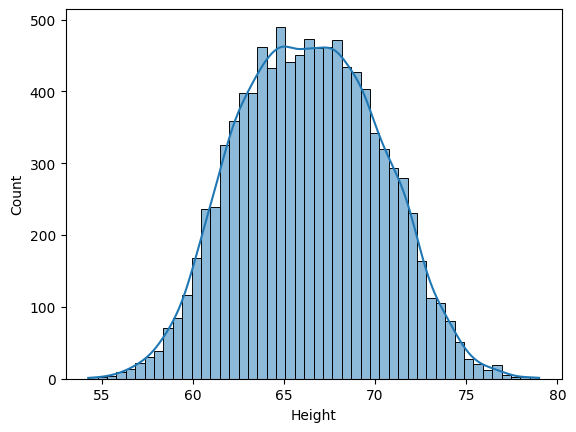

In [31]:
sns.histplot(height, kde = True)

## **QQ Plot**

In [32]:
from statsmodels.graphics.gofplots import qqplot

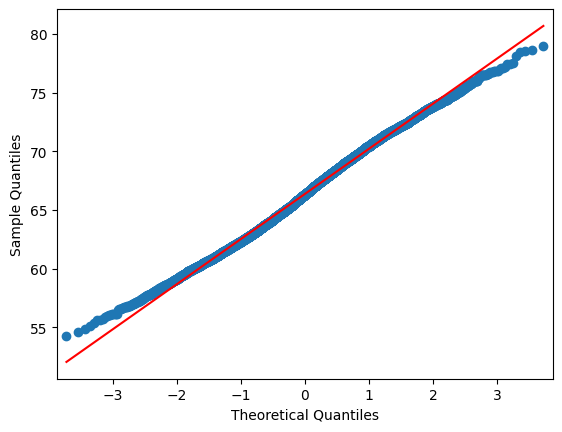

In [33]:
qqplot(height, line = 's')
plt.show()

# Redline is the line of best fit(Ideal Case) and the blue line is the actual data

In [34]:
# Non Normality Data
df_wt = pd.read_csv("./waiting_time.csv")
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<Axes: xlabel='time', ylabel='Count'>

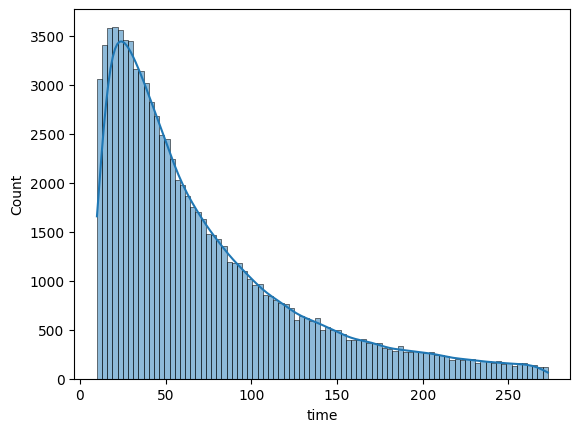

In [36]:
sns.histplot(df_wt['time'], kde = True)

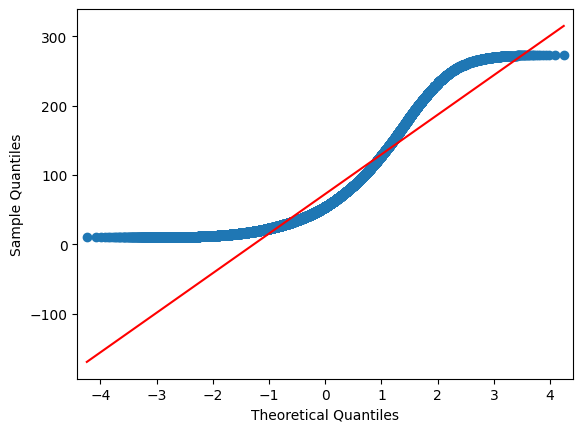

In [37]:
qqplot(df_wt['time'], line = 's')
plt.show()
# Redline is the line of best fit(Ideal Case) and the blue line is the actual data

## **Shapiro-Wilk Test** 
- Works well for small sample sizes (50-200)

In [38]:
from scipy.stats import shapiro

In [44]:
np.random.sample(42)
height_subset = height.sample(100)
height_subset.head()

9218    64.637502
2992    70.008973
8170    67.386285
5384    62.635927
3075    72.289596
Name: Height, dtype: float64

In [46]:
test_stat, p_value = shapiro(height_subset)
print("Stats: ", test_stat)
print("P-value: ", p_value)

Stats:  0.9932605624198914
P-value:  0.9032725691795349


In [47]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian

if p_value < 0.05:
  print("Reject H0")
else:
  print("Fail to reject H0")
  print("Data is Gaussian")

Fail to reject H0
Data is Gaussian


In [50]:
# For Waiting Time Data
time_subset = df_wt["time"].sample(100)
test_stat, p_value = shapiro(time_subset)
print("Stats: ", test_stat)
print("P-value: ", p_value)
# H0: Data is Gaussian
# Ha: Data is not Gaussian

if p_value < 0.05:
  print("Reject H0")
  print("Data is not Gaussian")
else:
  print("Fail to reject H0")
  print("Data is Gaussian")

Stats:  0.8310385942459106
P-value:  2.510169405667284e-09
Reject H0
Data is not Gaussian


## **Levene's Test**

In [57]:
from scipy.stats import levene

In [51]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


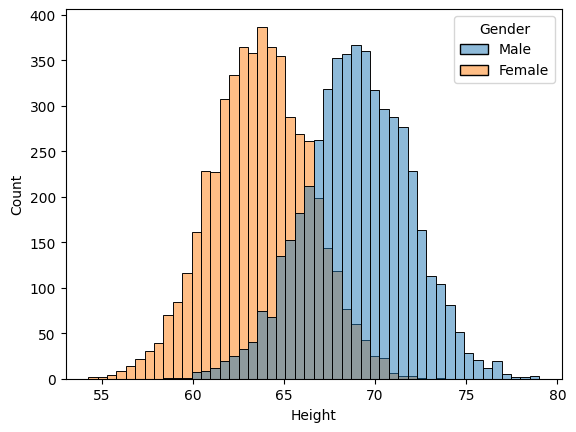

In [53]:
sns.histplot(data=df_hw, x='Height', hue='Gender')
plt.show()

In [54]:
height_men = df_hw[df_hw["Gender"] == "Male"]["Height"]
height_women = df_hw[df_hw["Gender"] == "Female"]["Height"]

In [55]:
height_men.var()

8.198843252520467

In [56]:
height_women.var()

7.2699474936701245

### **We can see the difference above but we Need test for if the men and women var are significantly different or not.**

In [58]:
# H0: Variance are equal
# Ha: Variance are not equal

levene_stat, p_value = levene(height_men,height_women)
print("Stats: ", test_stat)
print("P-value: ", p_value)

if p_value < 0.05:
  print("Reject H0")
  print("Variance are not equal")
else:
  print("Fail to reject H0")
  print("Variance are equal")


Stats:  0.8310385942459106
P-value:  0.0004586349895436178
Reject H0
Variance are not equal
